# FINAL PROJECT THICKET

In [301]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [303]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Random/*/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/ReverseSorted/*/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Perturbed/*/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/mpi/outs/Sorted/*/*.cali"))

# CUDA Thicket Variables

In [3]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Random/*/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/ReverseSorted/*/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Perturbed/*/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("BubbleSort/cuda/outs/Sorted/*/*.cali"))

In [305]:
tks = {}

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

In [306]:
# Performance data
tks["mpi_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              121569189     1   
                                                  244497352     1   
                                                  264763655     1   
                                                  267352453     1   
                                                  396802262     1   
                                                  406565177     1   
                                                  446143504     1   
                                                  573174663     1   
                                                  602627586     1   
                                                  712356224     1   
                                                  788286055     1   
                                                  791511023     1   
                                                  833366394     1   
                                                  907490309     1   
                                                  1017750183    1   
                                                  1049476715    1   
                                                  1171058059    1   
                                                  1201325766    1   
                                                  1300094249    1   
                                                  1382228857    1   
                                                  1424530190    1   
                                                  1447575159    1   
                                                  1510294426    1   
                                                  1555012850    1   
                                                  1756589640    1   
                                                  1815547707    1   
                                                  1867975594    1   
                                                  1939688023    1   
                                                  1954467605    1   
                                                  2011269404    1   
                                                  2103478004    1   
                                                  2222205902    1   
                                                  2239453462    1   
                                                  2289775128    1   
                                                  2291385317    1   
                                                  2506020778    1   
                                                  2515942954    1   
                                                  2608499705    1   
                                                  2614743939    1   
                                                  2677243835    1   
                                                  2709465597    1   
                                                  2760421031    1   
                                                  2856044889    1   
                                                  2925695988    1   
                                                  3097490828    1   
                                                  3324236143    1   
                                                  3577514750    1   
                                                  3988807078    1   
                                                  4284113784    1   
{'name': 'comm', 'type': 'function'}              121569189     3   
                                                  244497352     3   
                                                  264763655     3   
                                                  267352453     3   
                                                  396802262     3   
                                                  406565177     3   
                                                  446143504     3   
                                                  573174663 

In [307]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [308]:
tks["mpi_random"].metadata

cali.caliper.version  mpi.world.size  \
profile                                           
121569189            2.11.0-dev               8   
244497352            2.11.0-dev              64   
264763655            2.11.0-dev               4   
267352453            2.11.0-dev               8   
396802262            2.11.0-dev              32   
406565177            2.11.0-dev              64   
446143504            2.11.0-dev               8   
573174663            2.11.0-dev              16   
602627586            2.11.0-dev             128   
712356224            2.11.0-dev              64   
788286055            2.11.0-dev               4   
791511023            2.11.0-dev             128   
833366394            2.11.0-dev              32   
907490309            2.11.0-dev              16   
1017750183           2.11.0-dev             256   
1049476715           2.11.0-dev              64   
1171058059           2.11.0-dev             128   
1201325766           2.11.0-dev               4   
1300094249           2.11.0-dev               4   
1382228857           2.11.0-dev               2   
1424530190           2.11.0-dev              64   
1447575159           2.11.0-dev              32   
1510294426           2.11.0-dev             128   
1555012850           2.11.0-dev               8   
1756589640           2.11.0-dev             512   
1815547707           2.11.0-dev              16   
1867975594           2.11.0-dev             128   
1939688023           2.11.0-dev              32   
1954467605           2.11.0-dev               8   
2011269404           2.11.0-dev               2   
2103478004           2.11.0-dev             128   
2222205902           2.11.0-dev               2   
2239453462           2.11.0-dev              64   
2289775128           2.11.0-dev              32   
2291385317           2.11.0-dev               8   
2506020778           2.11.0-dev               2   
2515942954           2.11.0-dev              32   
2608499705           2.11.0-dev              32   
2614743939           2.11.0-dev              16   
2677243835           2.11.0-dev               8   
2709465597           2.11.0-dev              16   
2760421031           2.11.0-dev               2   
2856044889           2.11.0-dev               2   
2925695988           2.11.0-dev               2   
3097490828           2.11.0-dev            1024   
3324236143           2.11.0-dev               4   
3577514750           2.11.0-dev               4   
3988807078           2.11.0-dev               4   
4284113784           2.11.0-dev              16   

                                                 spot.metrics  \
profile                                                         
121569189   min#inclusive#sum#time.duration,max#inclusive#...   
244497352   min#inclusive#sum#time.duration,max#inclusive#...   
264763655   min#inclusive#sum#time.duration,max#inclusive#...   
267352453   min#inclusive#sum#time.duration,max#inclusive#...   
396802262   min#inclusive#sum#time.duration,max#inclusive#...   
406565177   min#inclusive#sum#time.duration,max#inclusive#...   
446143504   min#inclusive#sum#time.duration,max#inclusive#...   
573174663   min#inclusive#sum#time.duration,max#inclusive#...   
602627586   min#inclusive#sum#time.duration,max#inclusive#...   
712356224   min#inclusive#sum#time.duration,max#inclusive#...   
788286055   min#inclusive#sum#time.duration,max#inclusive#...   
791511023   min#inclusive#sum#time.duration,max#inclusive#...   
833366394   min#inclusive#sum#time.duration,max#inclusive#...   
907490309   min#inclusive#sum#time.duration,max#inclusive#...   
1017750183  min#inclusive#sum#time.duration,max#inclusive#...   
1049476715  min#inclusive#sum#time.duration,max#inclusive#...   
1171058059  min#inclusive#sum#time.duration,max#inclusive#...   
1201325766  min#inclusive#sum#time.duration,max#inclusive#...   
1300094249  min#inclusive#sum#time.duration,max#inclusive#...   
1382228857  min#inclusive#sum#time.duration,

In [309]:
gbs = {}

for i in tks.keys():
    if "strong" in i:
        gbs[i] = tks[i].groupby("InputSize")
    else:
        if i.startswith("cuda"):
            gbs[i] = tks[i].groupby("num_threads")
        else:
            gbs[i] = tks[i].groupby("num_procs")
        


7  thickets created...
{64: <thicket.thicket.Thicket object at 0x2b1c71e3f790>, 128: <thicket.thicket.Thicket object at 0x2b1c721d43d0>, 256: <thicket.thicket.Thicket object at 0x2b1c71be03d0>, 512: <thicket.thicket.Thicket object at 0x2b1c74b92130>, 1024: <thicket.thicket.Thicket object at 0x2b1c6ff39460>, 2048: <thicket.thicket.Thicket object at 0x2b1c6ef083d0>, 4096: <thicket.thicket.Thicket object at 0x2b1c75215d90>}
7  thickets created...
{64: <thicket.thicket.Thicket object at 0x2b1c752e1250>, 128: <thicket.thicket.Thicket object at 0x2b1c749abd60>, 256: <thicket.thicket.Thicket object at 0x2b1c73141a90>, 512: <thicket.thicket.Thicket object at 0x2b1c75656a30>, 1024: <thicket.thicket.Thicket object at 0x2b1c74df0f10>, 2048: <thicket.thicket.Thicket object at 0x2b1c75c61520>, 4096: <thicket.thicket.Thicket object at 0x2b1c72a9e550>}
7  thickets created...
{64: <thicket.thicket.Thicket object at 0x2b1c71ce7100>, 128: <thicket.thicket.Thicket object at 0x2b1c71bff340>, 256: <thicket

Compose these 3 groups column-wise to get a holistic view of the data

In [310]:
print(gbs.keys())

dict_keys(['cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed', 'mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed'])


In [314]:
ctks = {}

for i in gbs.keys():
    if "strong" in i:
        if i.startswith("cuda"):
            ctks[i] = th.Thicket.concat_thickets(
                thickets=list(gbs[i].values()),
                headers=list(gbs[i].keys()),
                axis="columns",
                metadata_key="num_threads"
            )
        else:
            ctks[i] = th.Thicket.concat_thickets(
                thickets=list(gbs[i].values()),
                headers=list(gbs[i].keys()),
                axis="columns",
                metadata_key="num_procs"
            )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="InputSize"
        )

In [315]:
# mpi_strong_random_ctk.dataframe

ctks["cuda_random"].dataframe

64  \
                                                              nid   
node                                              InputSize         
{'name': 'main', 'type': 'function'}              65536         1   
                                                  262144        1   
                                                  1048576       1   
                                                  4194304       1   
                                                  16777216      1   
                                                  67108864      1   
                                                  268435456  <NA>   
{'name': 'comm', 'type': 'function'}              65536         5   
                                                  262144        5   
                                                  1048576       5   
                                                  4194304       5   
                                                  16777216      5   
                                                  67108864      5   
                                                  268435456  <NA>   
{'name': 'comm_large', 'type': 'function'}        65536         6   
                                                  262144        6   
                                                  1048576       6   
                                                  4194304       6   
                                                  16777216      6   
                                                  67108864      6   
                                                  268435456  <NA>   
{'name': 'cudaMemcpy', 'type': 'function'}        65536         7   
                                                  262144        7   
                                                  1048576       7   
                                                  4194304       7   
                                                  16777216      7   
                                                  67108864      7   
                                                  268435456  <NA>   
{'name': 'comp', 'type': 'function'}              65536         3   
                                                  262144        3   
                                                  1048576       3   
                                                  4194304       3   
                                                  16777216      3   
                                                  67108864      3   
                                                  268435456  <NA>   
{'name': 'comp_large', 'type': 'function'}        65536         4   
                                                  262144        4   
                                                  1048576       4   
                                                  4194304       4   
                                                  16777216      4   
                                                  67108864      4   
                                                  268435456  <NA>   
{'name': 'correctness_check', 'type': 'function'} 65536         8   
                                                  262144        8   
                                                  1048576       8   
                                                  4194304       8   
                                                  16777216      8   
                                                  67108864      8   
                                                  268435456  <NA>   
{'name': 'data_init', 'type': 'function'}         65536         2   
                                                  262144        2   
                                                  1048576       2   
                                                  4194304       2   
                                                  16777216      2   
                                                  67108864      2   
                                                  268435456  

In [317]:
ctks["mpi_random"].dataframe

2  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              65536       1   
                                                  262144      1   
                                                  1048576     1   
                                                  4194304     1   
                                                  16777216    1   
                                                  67108864    1   
                                                  268435456   1   
{'name': 'comm', 'type': 'function'}              65536       3   
                                                  262144      3   
                                                  1048576     3   
                                                  4194304     3   
                                                  16777216    3   
                                                  67108864    3   
                                                  268435456   3   
{'name': 'MPI_Barrier', 'type': 'function'}       65536       4   
                                                  262144      4   
                                                  1048576     4   
                                                  4194304     4   
                                                  16777216    4   
                                                  67108864    4   
                                                  268435456   4   
{'name': 'comm_large', 'type': 'function'}        65536       5   
                                                  262144      5   
                                                  1048576     5   
                                                  4194304     5   
                                                  16777216    5   
                                                  67108864    5   
                                                  268435456   5   
{'name': 'MPI_Recv', 'type': 'function'}          65536       7   
                                                  262144      7   
                                                  1048576     7   
                                                  4194304     7   
                                                  16777216    7   
                                                  67108864    7   
                                                  268435456   7   
{'name': 'MPI_Send', 'type': 'function'}          65536       6   
                                                  262144      6   
                                                  1048576     6   
                                                  4194304     6   
                                                  16777216    6   
                                                  67108864    6   
                                                  268435456   6   
{'name': 'comm_small', 'type': 'function'}        65536      10   
                                                  262144     10   
                                                  1048576    10   
                                                  4194304    10   
                                                  16777216   10   
                                                  67108864   10   
                                                  268435456  10   
{'name': 'MPI_Gather', 'type': 'function'}        65536      11   
                                                  262144     11   
                                                  1048576    11   
                                                  4194304    11   
                                                  16777216   11   
                                                  67108864   11   
                                                  268435456  11   
{'name': 'comp', 'type': 'function'}              65536       8   
                                          

In [318]:
for i in ctks.keys():
    if "strong" in i:
        if "cuda" in i:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
            #ctks[i].dataframe.columns = ctks[i].dataframe.columns.droplevel(1)
        else: 
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (1048576, "nid"), (1048576, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
            #ctks[i].dataframe.columns = ctks[i].dataframe.columns.droplevel(1)
    else:
        if "cuda" in i:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (2048, "nid"), (2048, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
        else:
            ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", ""), (128, "nid"), (128, "spot.channel")], axis=1)
            ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [319]:
ctks["mpi_reverse"].dataframe

2                                             \
                            nid   spot.channel Min time/rank Max time/rank   
name              InputSize                                                  
main              65536       1  regionprofile      0.494166      0.511149   
                  262144      1  regionprofile      0.518035      0.522473   
                  1048576     1  regionprofile      0.754049      0.758219   
                  4194304     1  regionprofile      1.799352      1.839575   
                  16777216    1  regionprofile      6.052400      6.264433   
                  67108864    1  regionprofile     25.248421     25.678072   
                  268435456   1  regionprofile    100.980090    102.924651   
comm              65536       3  regionprofile      0.034968      0.045091   
                  262144      3  regionprofile      0.014738      0.025064   
                  1048576     3  regionprofile      0.035225      0.050006   
                  4194304     3  regionprofile      0.046992      0.056732   
                  16777216    3  regionprofile      0.131462      0.140002   
                  67108864    3  regionprofile      0.511556      0.532085   
                  268435456   3  regionprofile      1.892330      2.339597   
MPI_Barrier       65536       4  regionprofile      0.016075      0.026376   
                  262144      4  regionprofile      0.013770      0.017990   
                  1048576     4  regionprofile      0.010786      0.021674   
                  4194304     4  regionprofile      0.011708      0.024950   
                  16777216    4  regionprofile      0.009889      0.032421   
                  67108864    4  regionprofile      0.030354      0.053292   
                  268435456   4  regionprofile      0.019564      0.035107   
comm_large        65536       5  regionprofile      0.018532      0.018625   
                  262144      5  regionprofile      0.000577      0.006388   
                  1048576     5  regionprofile      0.002038      0.027482   
                  4194304     5  regionprofile      0.020442      0.040073   
                  16777216    5  regionprofile      0.077394      0.083636   
                  67108864    5  regionprofile      0.280468      0.339832   
                  268435456   5  regionprofile      1.017555      1.919658   
MPI_Recv          65536       7  regionprofile      0.018455      0.018479   
                  262144      7  regionprofile      0.000464      0.005981   
                  1048576     7  regionprofile      0.001477      0.025931   
                  4194304     7  regionprofile      0.015348      0.024891   
                  16777216    7  regionprofile      0.053897      0.058471   
                  67108864    7  regionprofile      0.185163      0.242013   
                  268435456   7  regionprofile      0.604523      1.599287   
MPI_Send          65536       6  regionprofile      0.000048      0.000119   
                  262144      6  regionprofile      0.000091      0.000377   
                  1048576     6  regionprofile      0.000531      0.001500   
                  4194304     6  regionprofile      0.005046      0.015111   
                  16777216    6  regionprofile      0.023433      0.025108   
                  67108864    6  regionprofile      0.095226      0.097735   
                  268435456   6  regionprofile      0.320287      0.412945   
comm_small        65536      10  regionprofile      0.000132      0.000217   
                  262144     10  regionprofile      0.000340      0.000626   
                  1048576    10  regionprofile      0.011448      0.011660   
                  4194304    10  regionprofile      0.001506      0.004865   
                  16777216   10  regionprofile      0.021556      0.046412   
                  67108864   10  regionprofile      0.118338      0.221182   
                  268435456  10  regionprofile      

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [320]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# function_names = set(ctks["cuda_reverse"].dataframe.index.get_level_values("name"))
# if "strong" in "cuda_reverse":
#     if "cuda_reverse".startswith("cuda"):
#         threads = sorted(list(set(ctks["cuda_strong_reverse"].dataframe.index.get_level_values("num_threads"))))
#     else:
#         threads = sorted(list(set(ctks["cuda_strong_reverse"].dataframe.index.get_level_values("num_procs"))))
# else:
#     threads = sorted(list(set(ctks["cuda_strong_reverse"].dataframe.index.get_level_values("InputSize"))))
# matrix_sizes = sorted(ctks["cuda_strong_reverse"].dataframe.columns.tolist())
# print(function_names)
# for name in function_names:
#     plot_pandas(
#         df=ctks["cuda_strong_reverse"].dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         loglog=False
#     )

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

# Examples

In [321]:
ctks["cuda_random"].dataframe.loc["main"]

64                                                           \
            nid   spot.channel Min time/rank Max time/rank Avg time/rank   
InputSize                                                                  
65536         1  regionprofile      0.545016      0.545016      0.545016   
262144        1  regionprofile      0.517829      0.517829      0.517829   
1048576       1  regionprofile      0.932938      0.932938      0.932938   
4194304       1  regionprofile      6.707549      6.707549      6.707549   
16777216      1  regionprofile    100.133701    100.133701    100.133701   
67108864      1  regionprofile   1589.568266   1589.568266   1589.568266   
268435456  <NA>            NaN           NaN           NaN           NaN   

                                                                              \
            Total time Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
InputSize                                                                      
65536         0.545016          0.004673          0.004673          0.004673   
262144        0.517829          0.040938          0.040938          0.040938   
1048576       0.932938          0.481919          0.481919          0.481919   
4194304       6.707549          6.184963          6.184963          6.184963   
16777216    100.133701         99.285156         99.285156         99.285156   
67108864   1589.568266       1587.195975       1587.195975       1587.195975   
268435456          NaN               NaN               NaN               NaN   

                           128                                             \
          Total GPU time   nid   spot.channel Min time/rank Max time/rank   
InputSize                                                                   
65536           0.004673     1  regionprofile      0.467121      0.467121   
262144          0.040938     1  regionprofile      0.859688      0.859688   
1048576         0.481919     1  regionprofile      1.264807      1.264807   
4194304         6.184963     1  regionprofile      6.723185      6.723185   
16777216       99.285156     1  regionprofile     99.717139     99.717139   
67108864     1587.195975     1  regionprofile   1585.043672   1585.043672   
268435456            NaN  <NA>            NaN           NaN           NaN   

                                                                          \
          Avg time/rank   Total time Avg GPU time/rank Min GPU time/rank   
InputSize                                                                  
65536          0.467121     0.467121          0.004989          0.004989   
262144         0.859688     0.859688          0.047579          0.047579   
1048576        1.264807     1.264807          0.487929          0.487929   
4194304        6.723185     6.723185          6.196236          6.196236   
16777216      99.717139    99.717139         98.862806         98.862806   
67108864    1585.043672  1585.043672       1582.923692       1582.923692   
268435456           NaN          NaN               NaN               NaN   

                                             256                               \
          Max GPU time/rank Total GPU time   nid   spot.channel Min time/rank   
InputSize                                                                       
65536              0.004989       0.004989     1  regionprofile      0.439260   
262144             0.047579       0.047579     1  regionprofile      0.843942   
1048576            0.487929       0.487929     1  regionprofile      0.948661   
4194304            6.196236       6.196236     1  regionprofile      7.079406   
16777216          98.862806      98.862806     1  regionprofile     99.436190   
67108864        1582.923692    1582.923692     1  regionprofile   1577.673036   
268435456               NaN            NaN  <NA>            NaN           NaN   

                                                                      \
          Max time/rank Avg time/ran

In [322]:
ctks["mpi_reverse"].dataframe.loc["comp_large"]

2                                                           \
          nid   spot.channel Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
65536       9  regionprofile      0.005411      0.005418      0.005414   
262144      9  regionprofile      0.047581      0.048506      0.048043   
1048576     9  regionprofile      0.204447      0.208275      0.206361   
4194304     9  regionprofile      0.927366      0.928184      0.927775   
16777216    9  regionprofile      4.002988      4.009158      4.006073   
67108864    9  regionprofile     17.136046     17.142845     17.139445   
268435456   9  regionprofile     69.200181     69.424485     69.312333   

                                           4                               \
           Total time Variance time/rank nid   spot.channel Min time/rank   
InputSize                                                                   
65536        0.010828           0.000000   9  regionprofile      0.005004   
262144       0.096087           0.000000   9  regionprofile      0.070649   
1048576      0.412722           0.000004   9  regionprofile      0.380803   
4194304      1.855550           0.000000   9  regionprofile      1.740477   
16777216     8.012146           0.000010   9  regionprofile      7.662942   
67108864    34.278890           0.000012   9  regionprofile     32.501580   
268435456  138.624666           0.012578   9  regionprofile    134.048929   

                                                                       8  \
          Max time/rank Avg time/rank  Total time Variance time/rank nid   
InputSize                                                                  
65536          0.009960      0.007483    0.029932           0.000006   9   
262144         0.174340      0.120815    0.483260           0.001801   9   
1048576        0.797674      0.592777    2.371107           0.040512   9   
4194304        3.548757      2.635900   10.543600           0.778529   9   
16777216      15.377666     11.519442   46.077768          14.768065   9   
67108864      65.823931     49.085243  196.340970         267.487701   9   
268435456    267.874218    200.948828  803.795313        4474.638568   9   

                                                                    \
            spot.channel Min time/rank Max time/rank Avg time/rank   
InputSize                                                            
65536      regionprofile      0.004651      0.029301      0.012118   
262144     regionprofile      0.095246      0.308358      0.219121   
1048576    regionprofile      0.672085      1.483650      1.227293   
4194304    regionprofile      3.343860      6.794597      5.888167   
16777216   regionprofile     14.669933     29.420990     25.713205   
67108864   regionprofile     62.807832    125.759417    109.770617   
268435456  regionprofile    253.809510    514.136909    448.120738   

                                           16                               \
            Total time Variance time/rank nid   spot.channel Min time/rank   
InputSize                                                                    
65536         0.096942           0.000057   9  regionprofile      0.004347   
262144        1.752971           0.004053   9  regionprofile      0.080131   
1048576       9.818347           0.100937   9  regionprofile      1.236777   
4194304      47.105332           2.123990   9  regionprofile      6.290573   
16777216    205.705643          40.553535   9  regionprofile     28.067429   
67108864    878.164933         728.526202   9  regionprofile    120.844895   
268435456  3584.965904       12320.876796   9  regionprofile    493.819036   

                                                                          32  \
          Max time/rank Avg time/rank    Total time Variance time/rank   nid   
InputSize                                                                      
65536          0.

In [323]:
ctks["mpi_reverse"].dataframe.loc["comp_large"]

2                                                           \
          nid   spot.channel Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
65536       9  regionprofile      0.005411      0.005418      0.005414   
262144      9  regionprofile      0.047581      0.048506      0.048043   
1048576     9  regionprofile      0.204447      0.208275      0.206361   
4194304     9  regionprofile      0.927366      0.928184      0.927775   
16777216    9  regionprofile      4.002988      4.009158      4.006073   
67108864    9  regionprofile     17.136046     17.142845     17.139445   
268435456   9  regionprofile     69.200181     69.424485     69.312333   

                                           4                               \
           Total time Variance time/rank nid   spot.channel Min time/rank   
InputSize                                                                   
65536        0.010828           0.000000   9  regionprofile      0.005004   
262144       0.096087           0.000000   9  regionprofile      0.070649   
1048576      0.412722           0.000004   9  regionprofile      0.380803   
4194304      1.855550           0.000000   9  regionprofile      1.740477   
16777216     8.012146           0.000010   9  regionprofile      7.662942   
67108864    34.278890           0.000012   9  regionprofile     32.501580   
268435456  138.624666           0.012578   9  regionprofile    134.048929   

                                                                       8  \
          Max time/rank Avg time/rank  Total time Variance time/rank nid   
InputSize                                                                  
65536          0.009960      0.007483    0.029932           0.000006   9   
262144         0.174340      0.120815    0.483260           0.001801   9   
1048576        0.797674      0.592777    2.371107           0.040512   9   
4194304        3.548757      2.635900   10.543600           0.778529   9   
16777216      15.377666     11.519442   46.077768          14.768065   9   
67108864      65.823931     49.085243  196.340970         267.487701   9   
268435456    267.874218    200.948828  803.795313        4474.638568   9   

                                                                    \
            spot.channel Min time/rank Max time/rank Avg time/rank   
InputSize                                                            
65536      regionprofile      0.004651      0.029301      0.012118   
262144     regionprofile      0.095246      0.308358      0.219121   
1048576    regionprofile      0.672085      1.483650      1.227293   
4194304    regionprofile      3.343860      6.794597      5.888167   
16777216   regionprofile     14.669933     29.420990     25.713205   
67108864   regionprofile     62.807832    125.759417    109.770617   
268435456  regionprofile    253.809510    514.136909    448.120738   

                                           16                               \
            Total time Variance time/rank nid   spot.channel Min time/rank   
InputSize                                                                    
65536         0.096942           0.000057   9  regionprofile      0.004347   
262144        1.752971           0.004053   9  regionprofile      0.080131   
1048576       9.818347           0.100937   9  regionprofile      1.236777   
4194304      47.105332           2.123990   9  regionprofile      6.290573   
16777216    205.705643          40.553535   9  regionprofile     28.067429   
67108864    878.164933         728.526202   9  regionprofile    120.844895   
268435456  3584.965904       12320.876796   9  regionprofile    493.819036   

                                                                          32  \
          Max time/rank Avg time/rank    Total time Variance time/rank   nid   
InputSize                                                                      
65536          0.

In [19]:
function_names = ("main", "comp", "comm", "comm_large", "comp_large")

# MPI GRAPHS

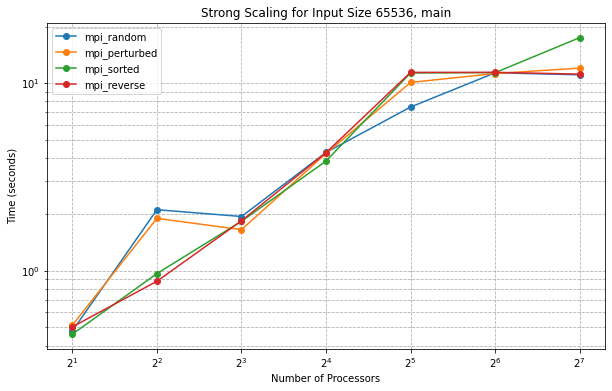

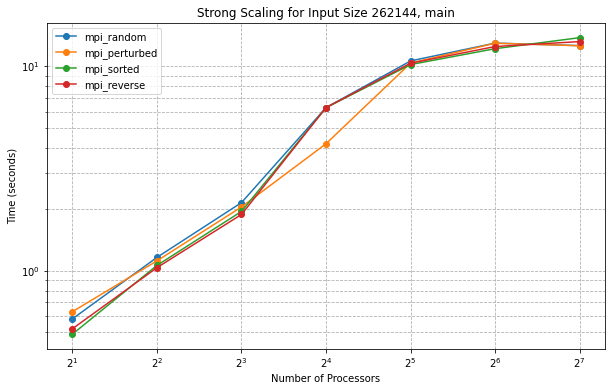

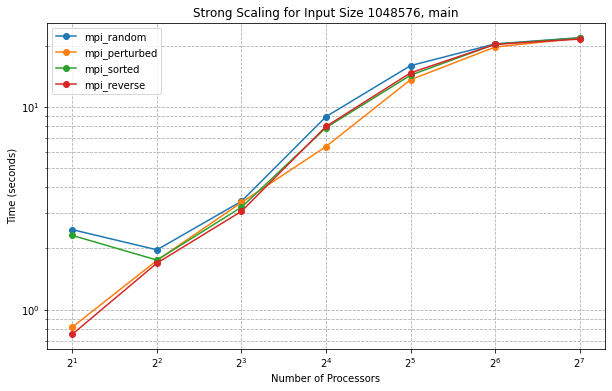

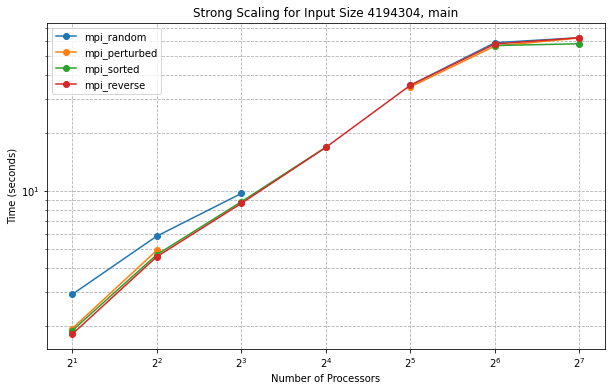

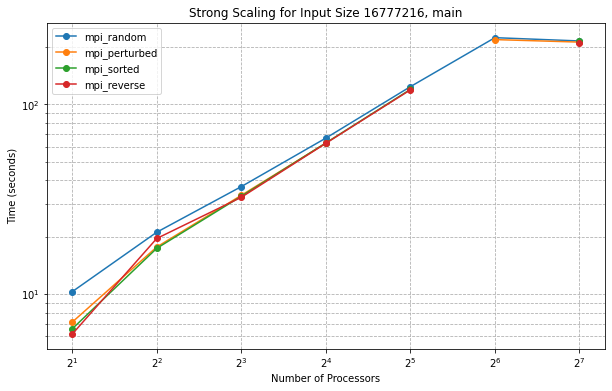

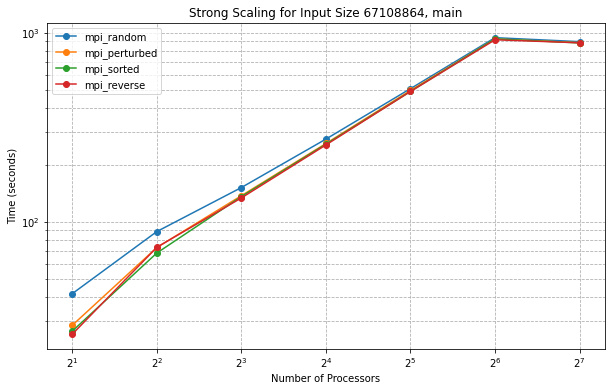

In [326]:
import numpy as np

mpi_procs = [2, 4, 8, 16, 32, 64, 128]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]
input_types = ["mpi_random", "mpi_perturbed", "mpi_sorted", "mpi_reverse"]

# Create a plot for each input size
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in mpi_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["main"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(mpi_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, main")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

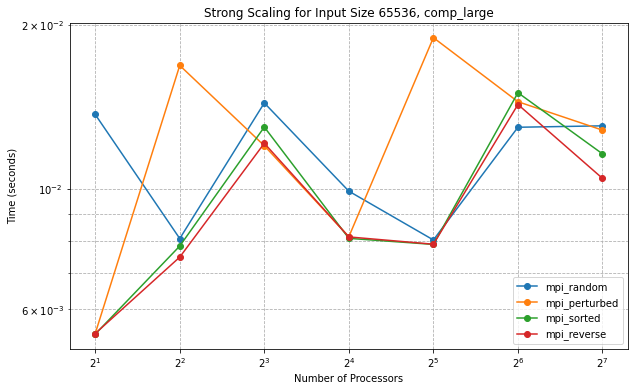

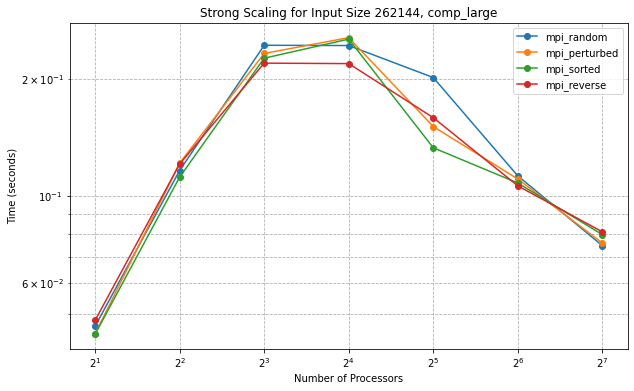

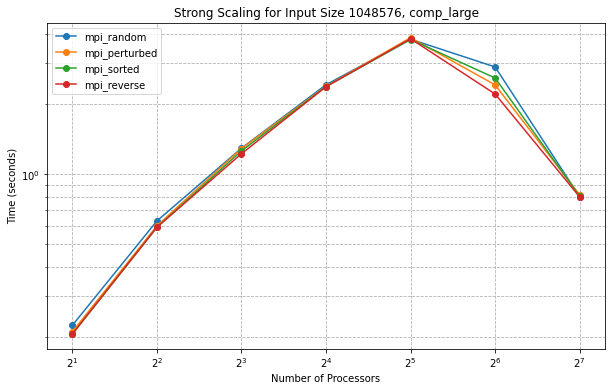

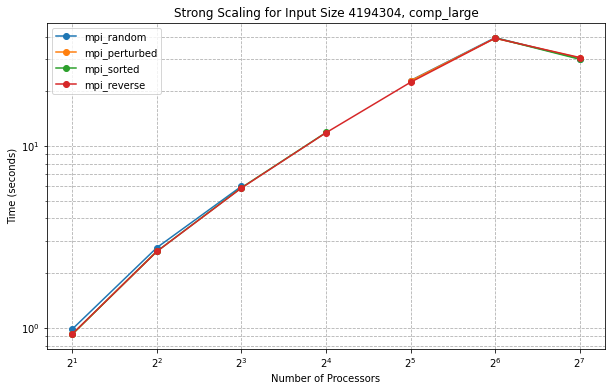

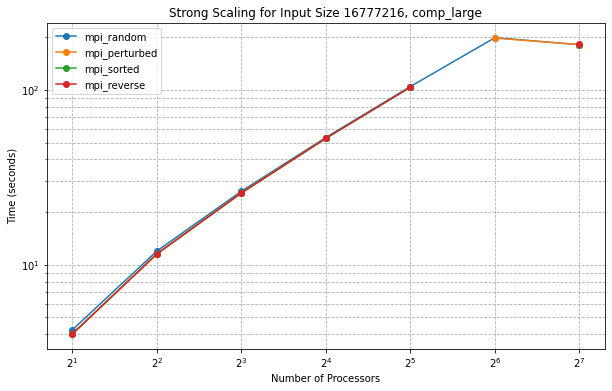

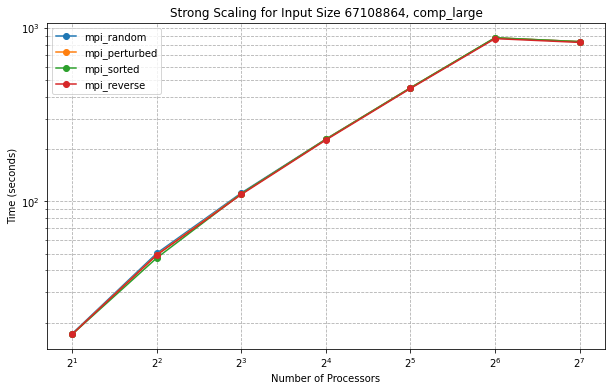

In [331]:
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in mpi_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["comp_large"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(mpi_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, comp_large")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

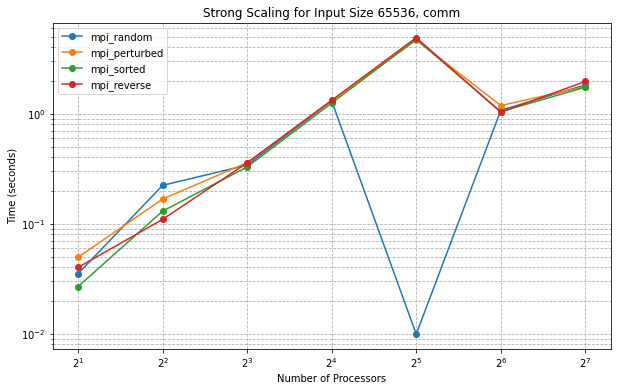

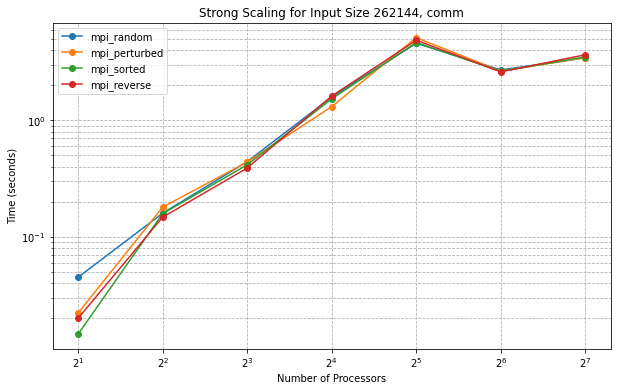

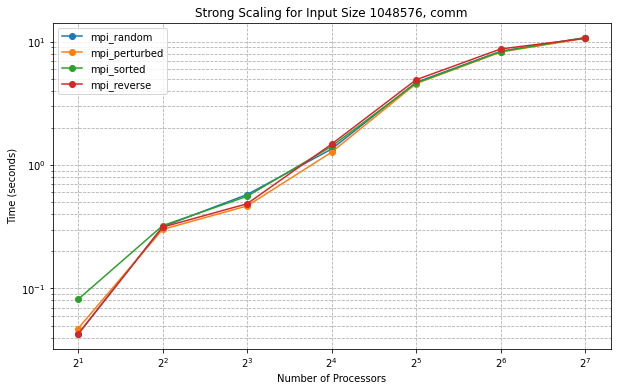

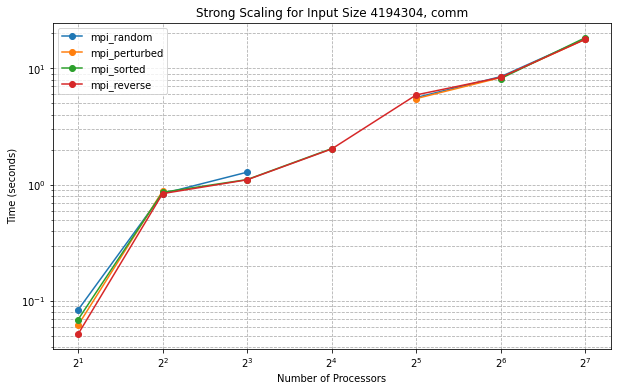

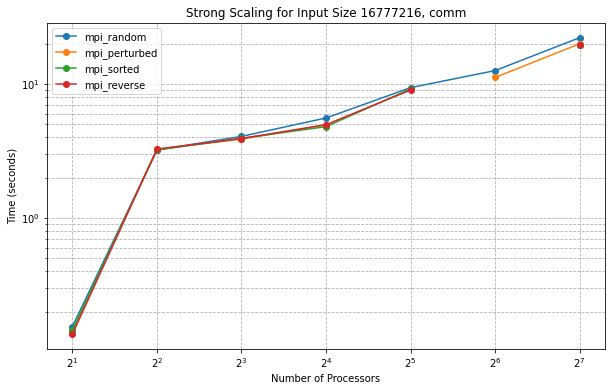

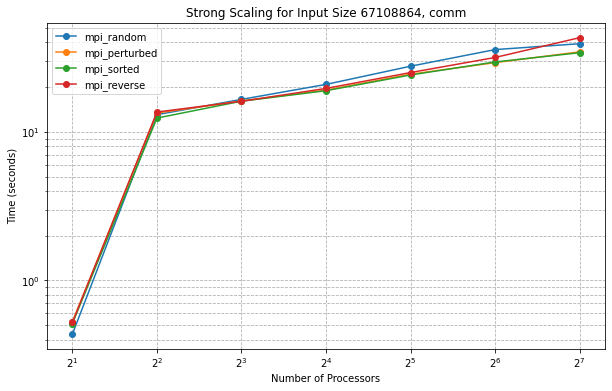

In [332]:
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in mpi_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["comm"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(mpi_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, comm")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

<Axes: title={'center': 'BubbleSort MPI 1%Perturbed Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

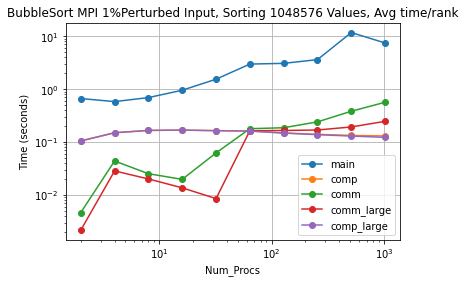

In [23]:
# for input_type in input_types:
#     plt.figure(figsize=(10, 6))
    
#     # Plot a line for each input type
#     for input_type in input_types:
#         times = []
#         for proc in mpi_procs:
#             # Extract the average time per rank for the current processor count and input type
#             avg_time = ctks[input_type].dataframe.loc["comm"].xs(input_size).loc[proc, 'Avg time/rank']
#             times.append(avg_time)
        
#         # Plot the current line
#         plt.plot(mpi_procs, times, marker='o', label=input_type)

#     # Set the title and labels for the current plot
#     plt.title(f"Strong Scaling for Input Size {input_size}, comm")
#     plt.xlabel("Number of Processors")
#     plt.ylabel("Time (seconds)")
#     plt.xscale('log', base=2)  # Update here
#     plt.yscale('log', base=10)  # And here
#     plt.grid(True, which="both", linestyle='--')
#     plt.legend()
#     plt.show()

<Axes: title={'center': 'BubbleSort MPI Reverse Input, Sorting 1048576 Values, Avg time/rank'}, xlabel='Num_Procs', ylabel='Time (seconds)'>

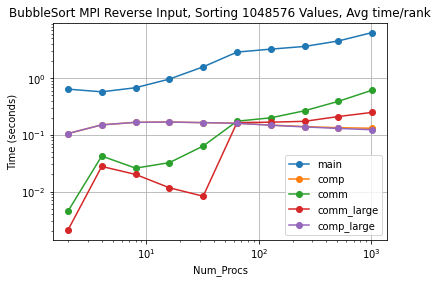

In [24]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_strong_reverse"].dataframe.loc[name][(1048576, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort MPI Reverse Input, Sorting 1048576 Values, Avg time/rank",
    xlabel="Num_Procs",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort MPI Random Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

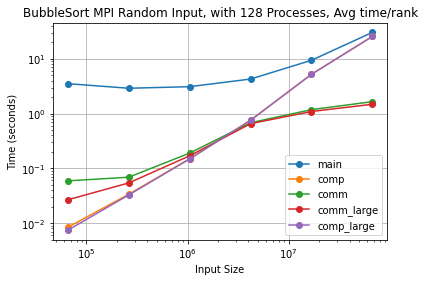

In [25]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_random"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort MPI Random Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort MPI Sorted Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

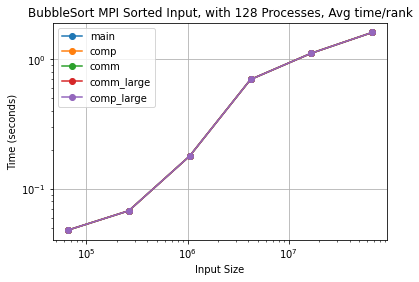

In [48]:
masterDF = pd.DataFrame()
poop = ("main", "comp", "comm", "comm_large", "comp_large")
for name in function_names:
    tempDF = ctks["mpi_weak_sorted"].dataframe.loc["comm"][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort MPI Sorted Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort MPI Reverse Input, with 128 Processes, Avg time/rank'}, xlabel='Input Size', ylabel='Time (seconds)'>

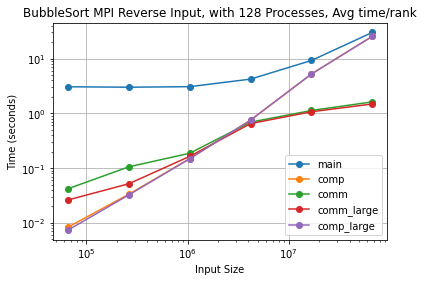

In [27]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["mpi_weak_reverse"].dataframe.loc[name][(128, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort MPI Reverse Input, with 128 Processes, Avg time/rank",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

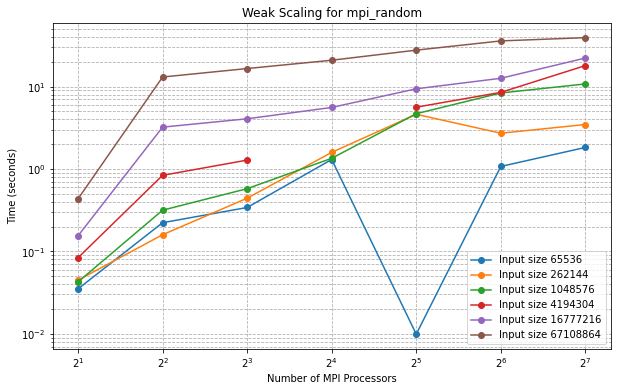

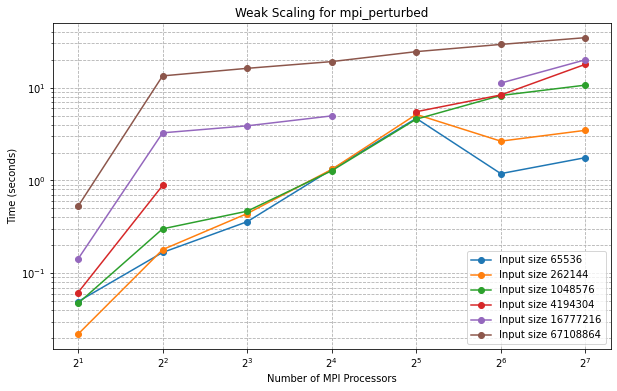

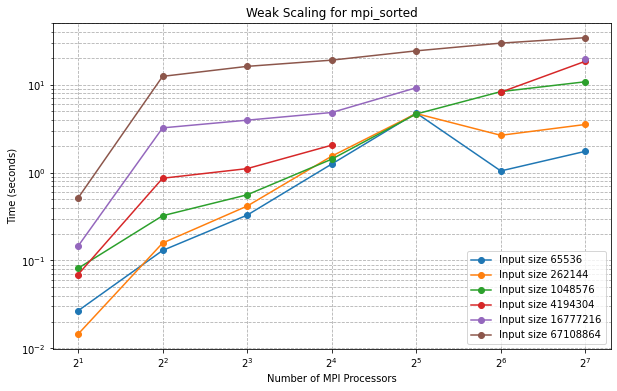

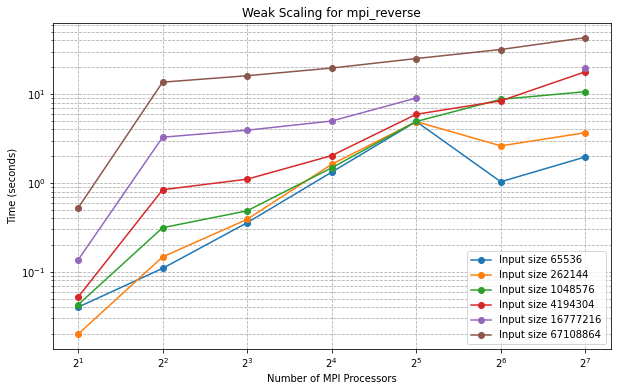

In [345]:
# masterDF = pd.DataFrame()
# for name in function_names:
#     tempDF = ctks["mpi_weak_perturbed"].dataframe.loc[name][(128, "Avg time/rank")]
#     tempDF = tempDF.rename(name)    
#     masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
# plot_pandas(
#     df=masterDF,
#     title="SampleSort MPI 1%Perturbed Input, with 128 Processes, Avg time/rank",
#     xlabel="Input Size",
#     ylabel="Time (seconds)",
#     loglog=True
# )

mpi_procs = [2, 4, 8, 16, 32, 64, 128]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]
input_types = ["mpi_random", "mpi_perturbed", "mpi_sorted", "mpi_reverse"]

# For each input type, create a plot
for input_type in input_types:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input size
    for input_size in input_sizes:
        times = []
        for proc in mpi_procs:
            # Extract the average time per rank for the current processor count and input size
            avg_time = ctks[input_type].dataframe.loc["comm"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line, label it with the input size
        plt.plot(mpi_procs, times, marker='o', label=f'Input size {input_size}')

    # Set the title and labels for the current plot
    plt.title(f"Weak Scaling for {input_type}")
    plt.xlabel("Number of MPI Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

# CUDA GRAPHS

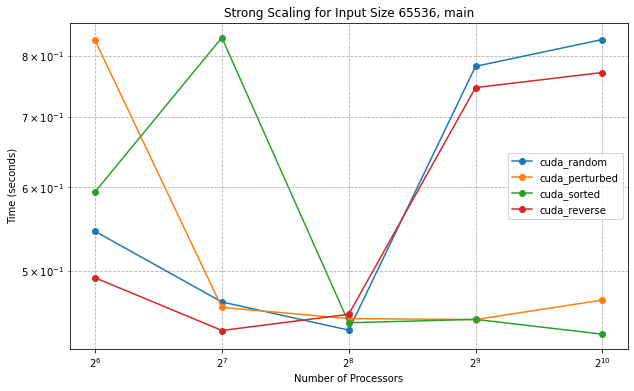

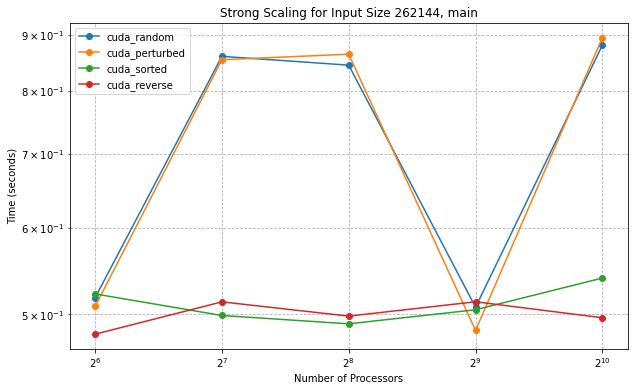

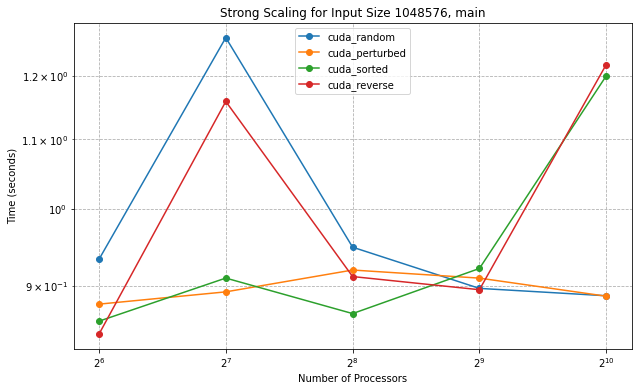

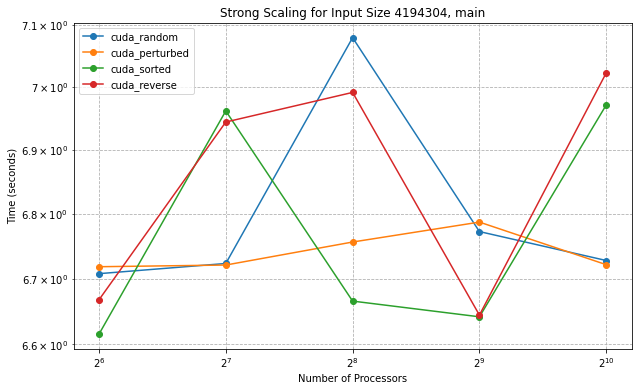

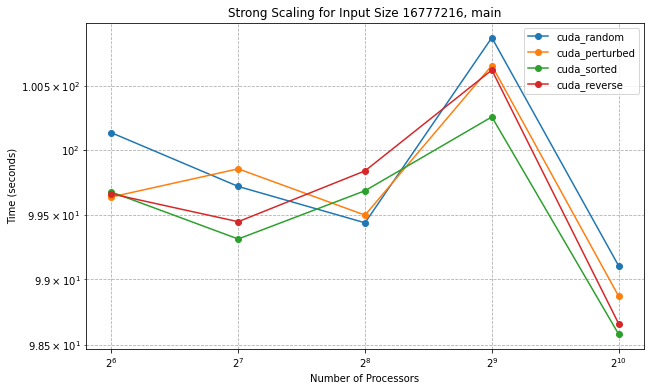

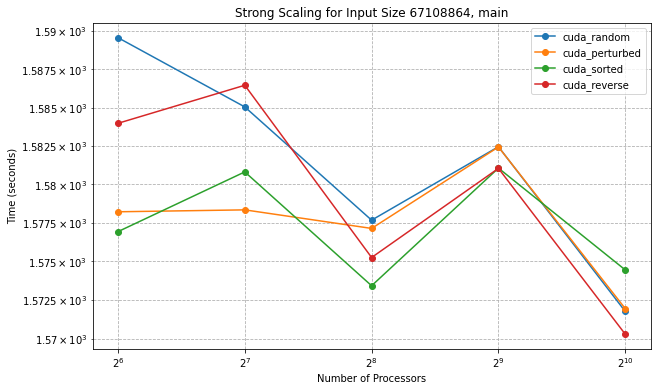

In [333]:
cuda_procs = [64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]
input_types = ["cuda_random", "cuda_perturbed", "cuda_sorted", "cuda_reverse"]

# Create a plot for each input size
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in cuda_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["main"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(cuda_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, main")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

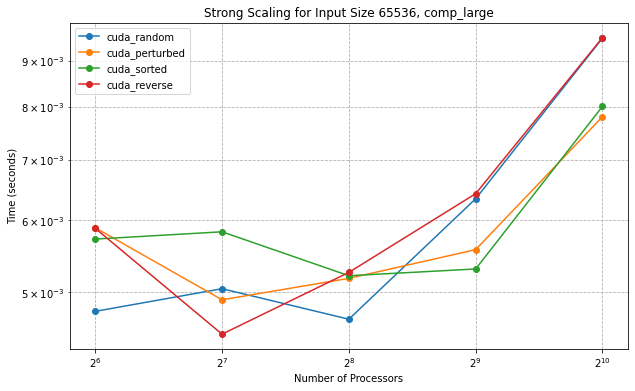

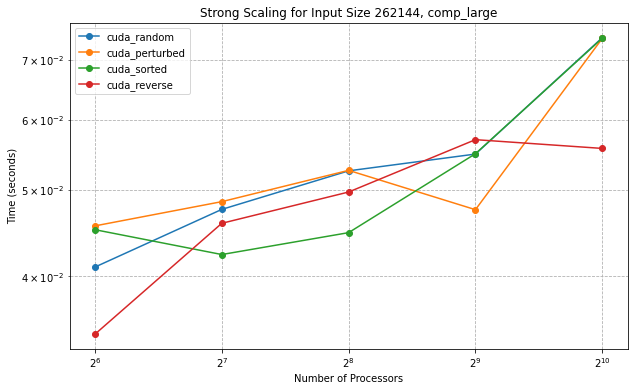

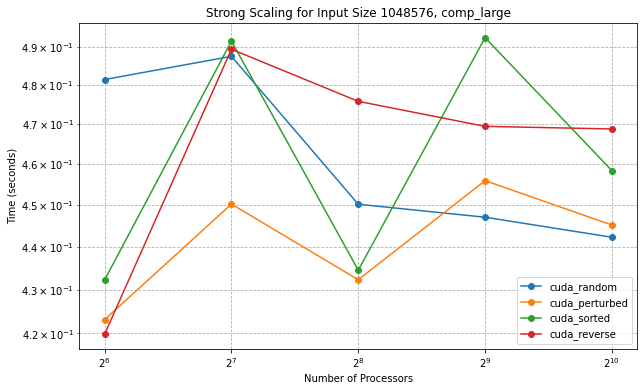

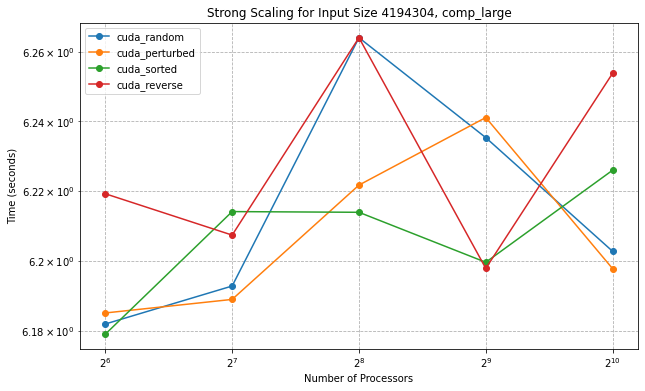

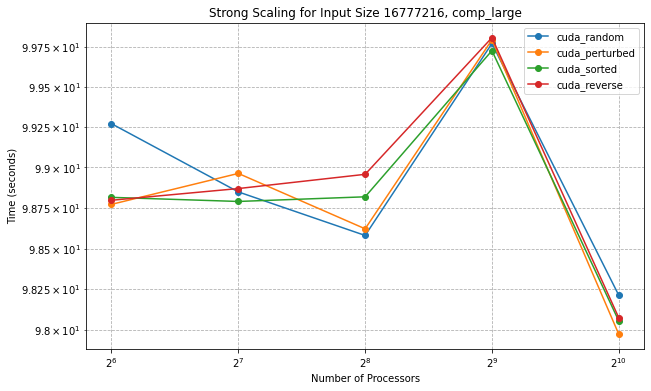

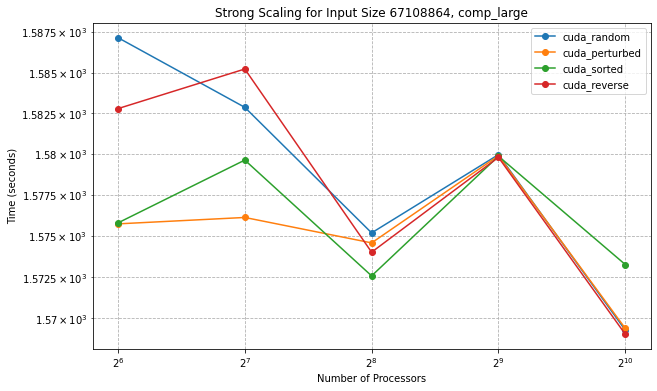

In [335]:
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in cuda_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["comp_large"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(cuda_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, comp_large")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

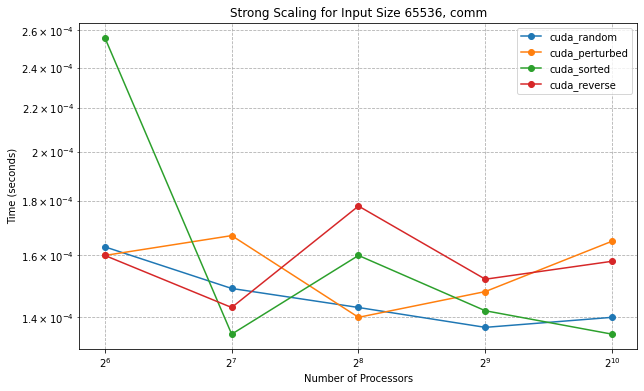

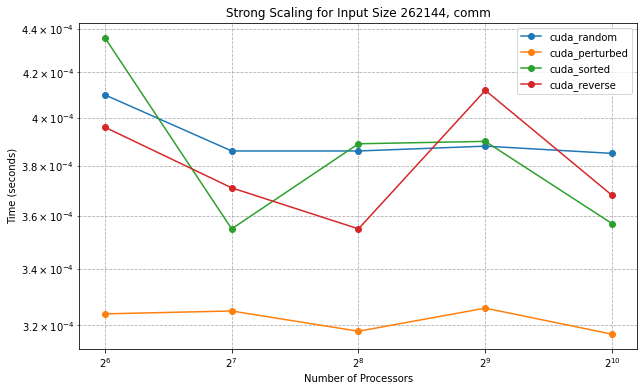

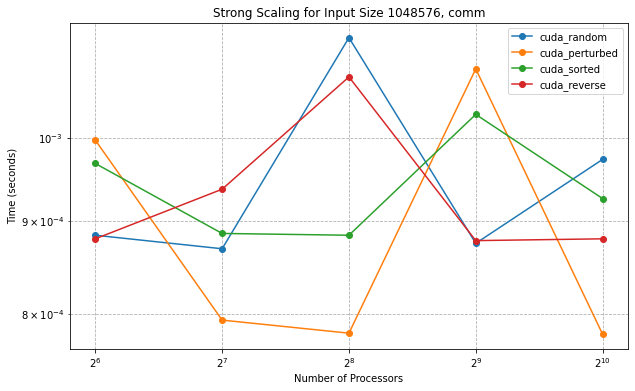

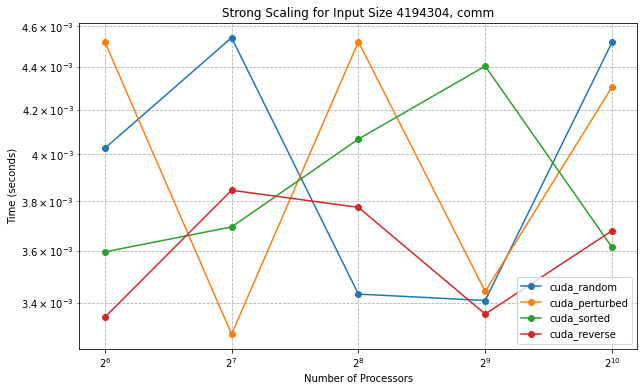

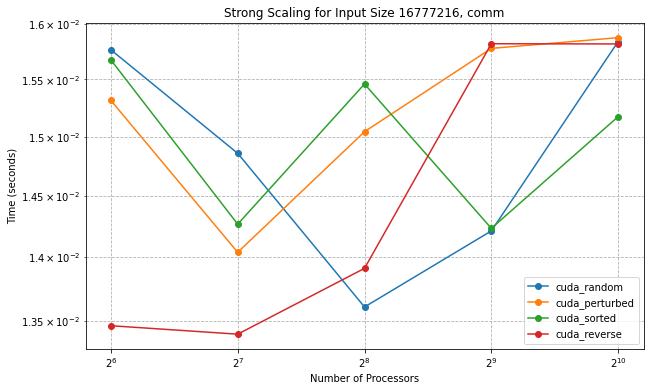

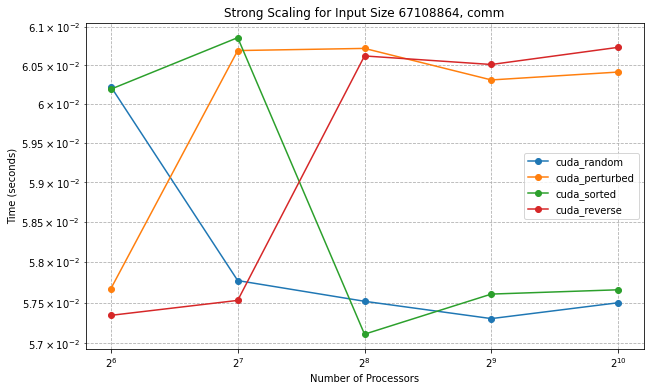

In [337]:
for input_size in input_sizes:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input type
    for input_type in input_types:
        times = []
        for proc in cuda_procs:
            # Extract the average time per rank for the current processor count and input type
            avg_time = ctks[input_type].dataframe.loc["comm"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line
        plt.plot(cuda_procs, times, marker='o', label=input_type)

    # Set the title and labels for the current plot
    plt.title(f"Strong Scaling for Input Size {input_size}, comm")
    plt.xlabel("Number of Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)  # Update here
    plt.yscale('log', base=10)  # And here
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()

<Axes: title={'center': 'BubbleSort CUDA Reverse Input, Sorting 65536 Values, Total GPU time'}, xlabel='Num_threads', ylabel='Time (seconds)'>

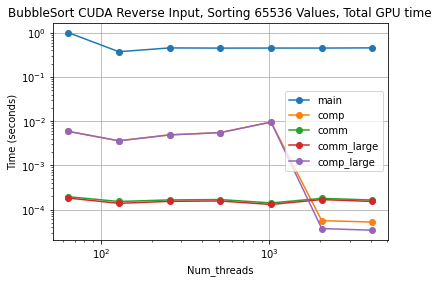

In [32]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_strong_reverse"].dataframe.loc[name][(65536, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort CUDA Reverse Input, Sorting 65536 Values, Total GPU time",
    xlabel="Num_threads",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort CUDA Random Input, with 2048 Threads, Total GPU time'}, xlabel='Input Size', ylabel='Time (seconds)'>

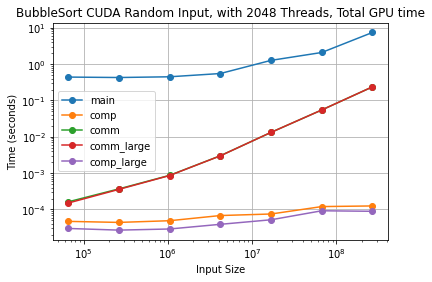

In [33]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_random"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort CUDA Random Input, with 2048 Threads, Total GPU time",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort CUDA Sorted Input, with 2048 Threads, Total GPU time'}, xlabel='Input Size', ylabel='Time (seconds)'>

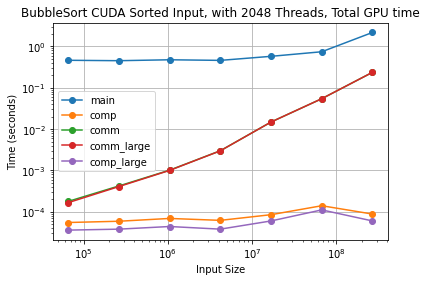

In [35]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_sorted"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort CUDA Sorted Input, with 2048 Threads, Total GPU time",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort CUDA 1%Perturbed Input, with 2048 Threads, Total GPU time'}, xlabel='Input Size', ylabel='Time (seconds)'>

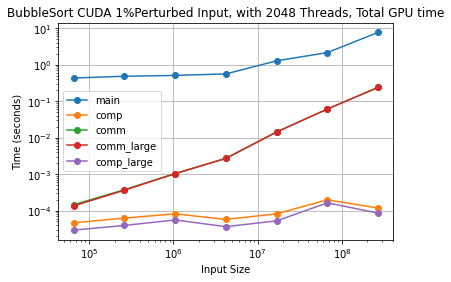

In [36]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_perturbed"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort CUDA 1%Perturbed Input, with 2048 Threads, Total GPU time",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

<Axes: title={'center': 'BubbleSort CUDA Reverse Input, with 2048 Threads, Total GPU time'}, xlabel='Input Size', ylabel='Time (seconds)'>

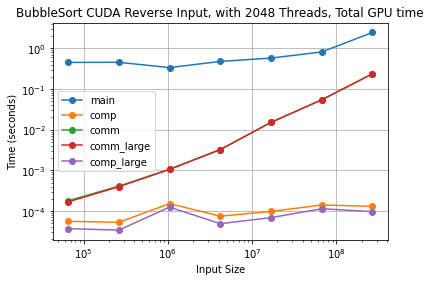

In [37]:
masterDF = pd.DataFrame()
for name in function_names:
    tempDF = ctks["cuda_weak_reverse"].dataframe.loc[name][(2048, "Avg time/rank")]
    tempDF = tempDF.rename(name)    
    masterDF = pd.concat([masterDF, tempDF], axis=1) 
    
plot_pandas(
    df=masterDF,
    title="BubbleSort CUDA Reverse Input, with 2048 Threads, Total GPU time",
    xlabel="Input Size",
    ylabel="Time (seconds)",
    loglog=True
)

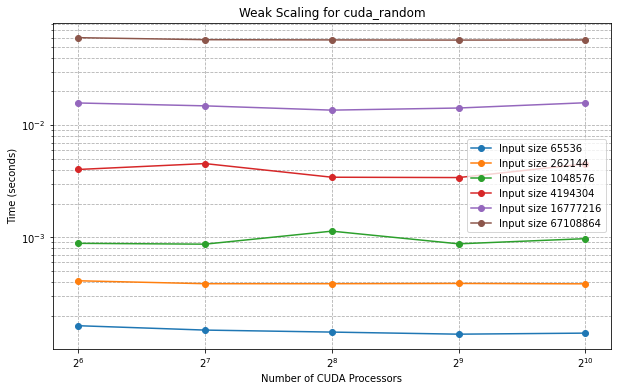

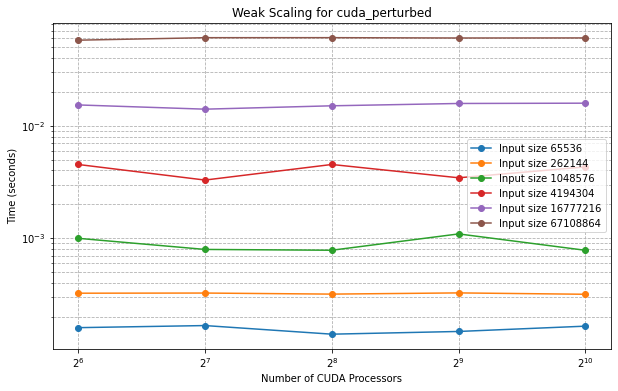

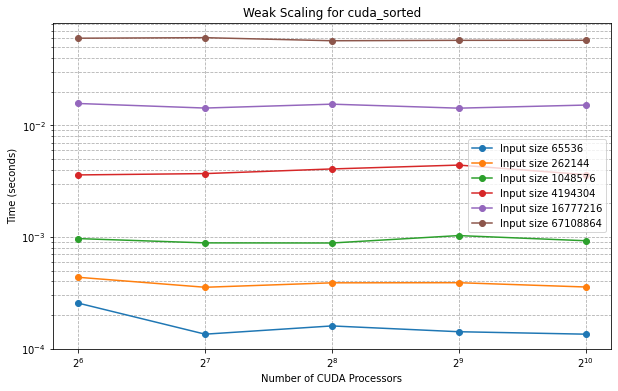

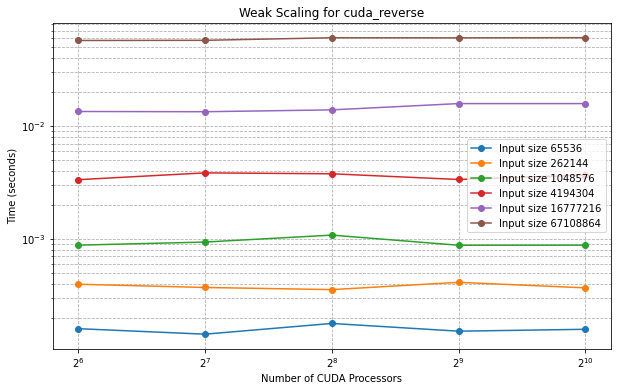

In [339]:
cuda_procs = [64, 128, 256, 512, 1024]
input_sizes = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]  # One for each 'cuda_procs'
input_types = ["cuda_random", "cuda_perturbed", "cuda_sorted", "cuda_reverse"]

# For each input type, create a plot
for input_type in input_types:
    plt.figure(figsize=(10, 6))
    
    # Plot a line for each input size
    for input_size in input_sizes:
        times = []
        for proc in cuda_procs:
            # Extract the average time per rank for the current processor count and input size
            avg_time = ctks[input_type].dataframe.loc["comm"].xs(input_size).loc[proc, 'Avg time/rank']
            times.append(avg_time)
        
        # Plot the current line, label it with the input size
        plt.plot(cuda_procs, times, marker='o', label=f'Input size {input_size}')

    # Set the title and labels for the current plot
    plt.title(f"Weak Scaling for {input_type}")
    plt.xlabel("Number of CUDA Processors")
    plt.ylabel("Time (seconds)")
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)
    plt.grid(True, which="both", linestyle='--')
    plt.legend()
    plt.show()